In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow 

from scipy import misc
import numpy as np

import copy

from gmm_image.gmm_image import predict_pixel_GMM_color_MSE, predict_pixel_GMM_color_MSE_gray , run_GMM, create_image_from_GMM, rgb2gray, sample_RGB_from_picture


In [21]:
from gmm_image.gmm_image import predict_pixel_GMM_color_MSE_colorgraymix

### Import and show sample image

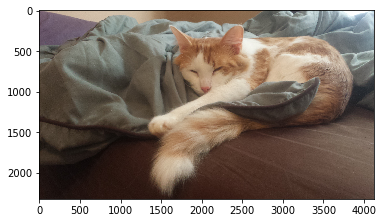

In [3]:
rgb_image_arr_nacho = misc.imread('nacho_pic.jpg',mode ='RGB') 
imshow(rgb_image_arr_nacho)

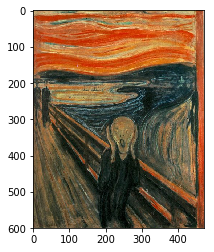

In [13]:
rgb_image_arr_scream = misc.imread('The_Scream.jpg',mode ='RGB') 
imshow(rgb_image_arr_scream)

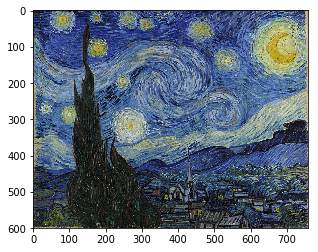

In [4]:
rgb_image_arr_starry_night = misc.imread('Starry_Night.jpg',mode ='RGB') 
imshow(rgb_image_arr_starry_night)

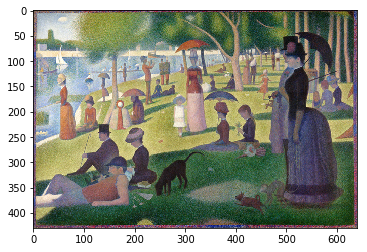

In [5]:
rgb_image_arr_sunday = misc.imread('A_Sunday_on_La_Grande_Jatte.png',mode ='RGB')
imshow(rgb_image_arr_sunday)

### Randomly sample RGB colors

In [58]:
rgb_pixel_values_scream = sample_RGB_from_picture(rgb_image_arr_scream,
                                                  total_sampled_pixels=100)
gmm_scream, gmm_labels_scream = run_GMM(rgb_pixel_values_scream,
                                        n_components=10)


rgb_pixel_values_sunday = sample_RGB_from_picture(rgb_image_arr_sunday,
                                                  total_sampled_pixels=10)
gmm_sunday, gmm_labels_sunday = run_GMM(rgb_pixel_values_sunday,
                                        n_components=10)

rgb_pixel_values_starry_night = sample_RGB_from_picture(rgb_image_arr_starry_night,
                                                        total_sampled_pixels=10)
gmm_starry_night, gmm_labels_starry_night = run_GMM(rgb_pixel_values_starry_night,
                                                    n_components=10)

### Run the GMM-EM algorithm, show image

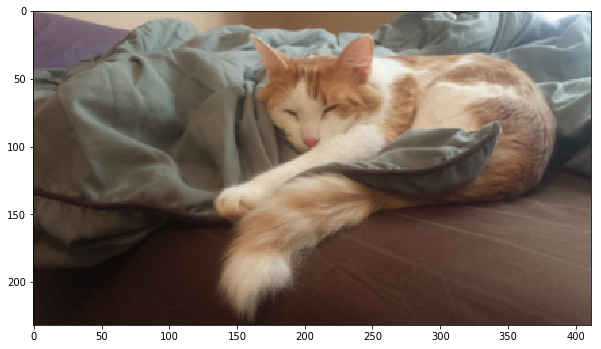

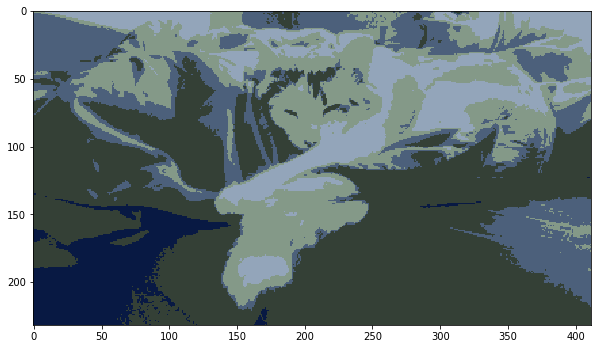

In [40]:
gmm_starry_night, gmm_labels_starry_night = run_GMM(rgb_pixel_values_starry_night,n_components=10)
create_image_from_GMM(rgb_image_arr_nacho,gmm_starry_night,show_original = True, gray = False)

# Use grayscale on the RGB means to find closest cluster

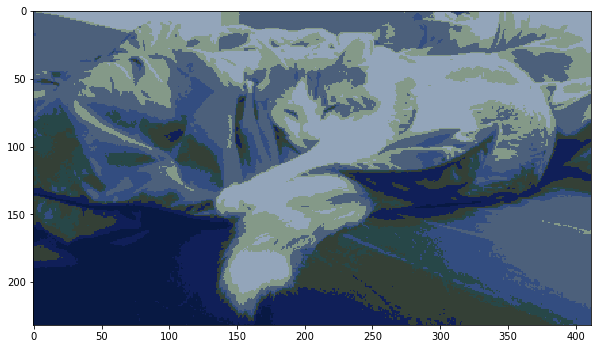

In [41]:
create_image_from_GMM(rgb_image_arr_nacho,gmm_starry_night,show_original = False, gray = True)

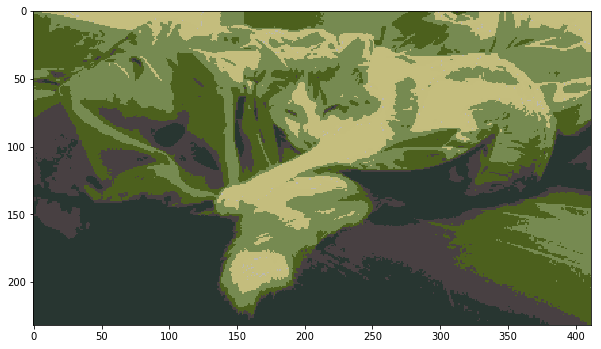

In [42]:
create_image_from_GMM(rgb_image_arr_nacho,gmm_sunday,show_original = False, gray = True)

In [43]:
from numpy import argmax, argmin, empty_like, dot
from sklearn.mixture import GMM
from scipy import misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow 
from random import sample


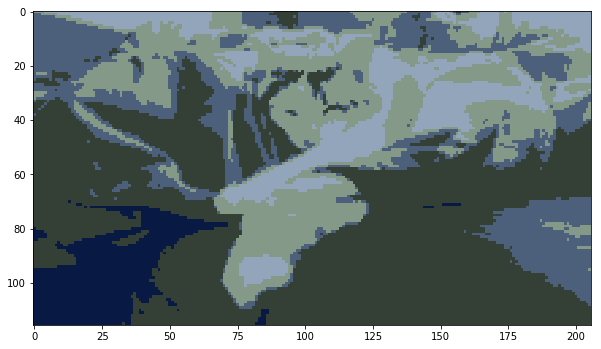

In [44]:
create_image_from_GMM_mix(rgb_image_arr_nacho,
                              gmm_starry_night,
                              downsample_factor = 0.05,
                              show_original = False,
                              mix_ratio=0)

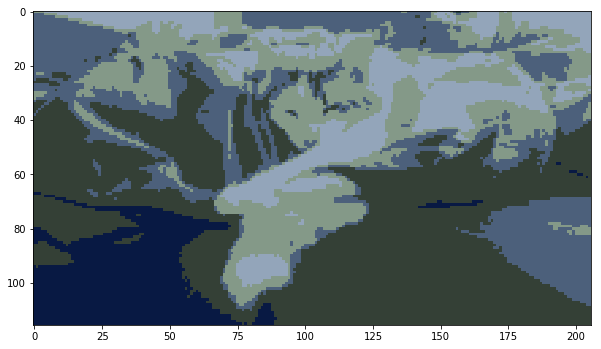

In [45]:
create_image_from_GMM_mix(rgb_image_arr_nacho,
                              gmm_starry_night,
                              downsample_factor = 0.05,
                              show_original = False,
                              mix_ratio=0.25)

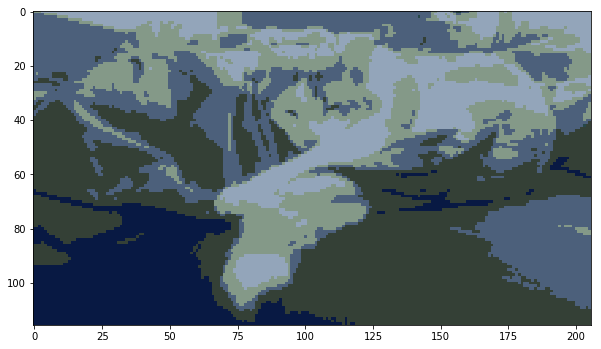

In [46]:
create_image_from_GMM_mix(rgb_image_arr_nacho,
                              gmm_starry_night,
                              downsample_factor = 0.05,
                              show_original = False,
                              mix_ratio=0.5)

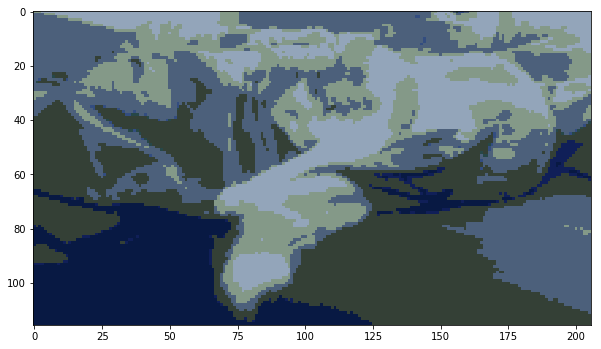

In [47]:
create_image_from_GMM_mix(rgb_image_arr_nacho,
                              gmm_starry_night,
                              downsample_factor = 0.05,
                              show_original = False,
                              mix_ratio=0.75)

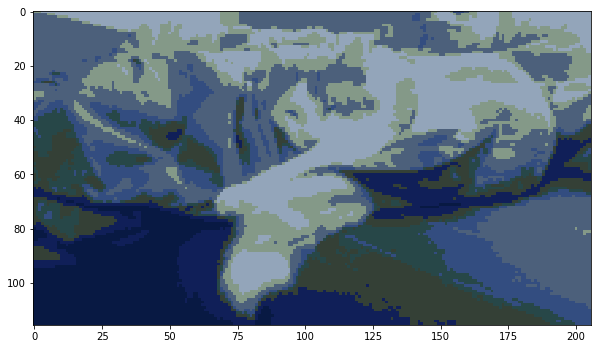

In [48]:
create_image_from_GMM_mix(rgb_image_arr_nacho,
                              gmm_starry_night,
                              downsample_factor = 0.05,
                              show_original = False,
                              mix_ratio=1.0)

In [57]:
create_image_from_GMM_mix(rgb_image_arr_nacho,
                          gmm_scream,
                          downsample_factor = 0.1,
                          show_original = False,
                          mix_ratio=0.6)

NameError: name 'gmm_scream' is not defined

In [17]:
def predict_pixel_GMM_color_MSE_colorgraymix(pixel, gmm, mix_ratio=0.5):
    pixel_MSE_gray = ((rgb2gray(gmm.means_) - rgb2gray(pixel)) ** 2)
    pixel_MSE_color = ((gmm.means_ - pixel) ** 2).mean(axis=1)
    pixel_MSE = pixel_MSE_gray*mix_ratio + pixel_MSE_color*(1-mix_ratio)
    
    return gmm.means_[argmin(pixel_MSE)],argmin(pixel_MSE)


def create_image_from_GMM_mix(rgb_image_arr,
                              gmm,
                              downsample_factor = 0.1,
                              show_original = False,
                              gray = True,
                              mix_ratio=0.5):

    rgb_image_arr_downsampled = misc.imresize(rgb_image_arr,downsample_factor)

    
    if show_original == True:
        plt.figure(figsize=(10,10))
        imshow(rgb_image_arr_downsampled)

    gmm_image_prediction = empty_like(rgb_image_arr_downsampled)


    for x in range(rgb_image_arr_downsampled.shape[0]):
        for y in range(rgb_image_arr_downsampled.shape[1]):
            gmm_image_prediction[x,y] = predict_pixel_GMM_color_MSE_colorgraymix(rgb_image_arr_downsampled[x,y],
                                                                                 gmm,
                                                                                 mix_ratio)[0]

    plt.figure(figsize=(10,10))
    imshow(gmm_image_prediction)

In [51]:
gmm = gmm_starry_night


def predict_cluster_eigens(image_pixel,gmm,gray = True):
    
    predict_pixel_GMM_color = predict_pixel_GMM_color_MSE
    if gray == True:
        predict_pixel_GMM_color = predict_pixel_GMM_color_MSE_gray
    
    return np.linalg.eig(gmm.covars_[predict_pixel_GMM_color(image_pixel,gmm)[1]])

In [136]:
def update_cluster_color(image_pixel,gmm,gray = True):

    predict_pixel_GMM_color = predict_pixel_GMM_color_MSE
    if gray == True:
        predict_pixel_GMM_color = predict_pixel_GMM_color_MSE_gray
    
    return (predict_cluster_eigens(image_pixel,gmm)[1]**2)[np.random.randint(3)]
    

In [ ]:
def find_all_pixels_in_cluster(pixel,gmm,gray = True):

    predict_pixel_GMM_color = predict_pixel_GMM_color_MSE
    if gray == True:
        predict_pixel_GMM_color = predict_pixel_GMM_color_MSE_gray
        
    flag == False    
    
    while flag == False:
        pixel[0]+i,pixel[1]+j
        
        
    
        
        
    
    
    
    
    

In [154]:
update_cluster_color(rgb_image_arr_nacho[200,200],gmm_starry_night)

array([ 0.12919897,  0.54194197,  0.27220445])

In [186]:
new_color = rgb_image_arr_nacho[200,200] + \
            update_cluster_color(rgb_image_arr_nacho[200,200],gmm_starry_night)
    
print rgb_image_arr_nacho[200,200]
print new_color

for


SyntaxError: invalid syntax (<ipython-input-186-8069a01a1972>, line 6)

In [ ]:
gray_image_arr_nacho = rgb2gray(rgb_image_arr_nacho)
print gray_image_arr_nacho.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(gray_image_arr_nacho)
StandardScaler(copy=True, with_mean=True, with_std=True)
gray_image_arr_nacho_scaled = scaler.transform(gray_image_arr_nacho)

In [ ]:
imshow(gray_image_arr_nacho_scaled,cmap='gray_r')

In [ ]:
test_image = np.empty([50,50,500])


def random_sample_image_paches(image):
    for i in range 500:
        test_image[:,:,i] = image[]

In [ ]:


imshow(rgb_image_arr_sunday[np.random.randint(50,430-50)+50,np.random.randint(50,430-50)+50])

In [ ]:
imshow(rgb2gray(rgb_image_arr_sunday[50:100,50:100]),cmap='gray_r')

plt.figure()
imshow(rgb_image_arr_sunday[50:100,50:100],cmap='gray_r')

In [ ]:
50*50

In [ ]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(
    hidden_layer_sizes=(1000,100,1000),  activation='relu', solver='adam', alpha=0.001, batch_size=1,
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=10000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

n = nn.fit(rgb2gray(rgb_image_arr_sunday[50:100,50:100]).flatten().reshape(1, -1),
           rgb_image_arr_sunday[50:100,50:100].flatten().reshape(1, -1))





In [ ]:
test_y = nn.predict(rgb2gray(rgb_image_arr_sunday[100:150,100:150]).flatten().reshape(1, -1))

imshow(test_y.reshape(50,50,3))